In [1]:
import random 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def sample_coin(k): 
    flips = random.choices(['H', 'T'], k=k) 
    # This is sampling from uniform distribution
    return flips

In [3]:
def sample_dice(k):
    rolls = random.choices([1, 2, 3, 4, 5, 6], k=k)
    return rolls

In [4]:
def sample_bus(n):
    times = []
    for bus in range(n):
        t = random.uniform(0, 10)
        times.append(t)
    return times

# Hypothesis test

(a)

Null hypothesis: The coin is fair.

Alternative: No, it’s biased towards heads.

(b)

Null hypothesis: The coin is fair.

Alternative: No, it's not.

In [5]:
actual_coin = random.choices(['H', 'T'], 
                             k=400, 
                             weights=[0.55, 0.45])
pd.DataFrame(actual_coin, columns=['coin']).to_csv('coins_400.csv', index=False)

,coin
0,H
1,H
2,H
3,T
4,H


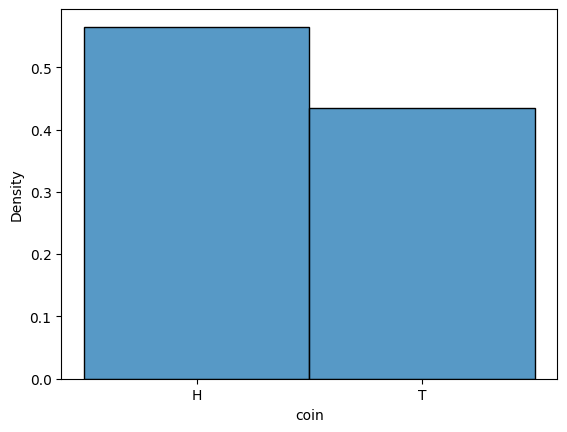

In [6]:
coins_400 = pd.read_csv('coins_400.csv')
sns.histplot(coins_400, x='coin', stat='density')
coins_400.head()

In [7]:
# (a) percent of heads
heads = (coins_400['coin']=='H')
t1 = sum(heads) / len(coins_400)
t1

0.565

In [8]:
# (b) | percent of heads - 50% | 
t2 = abs(t1 - 0.5)
t2

0.06499999999999995

In [9]:
# 1. Make a lot of simulated data under the null hypothesis
# 2. Calculate the statistics t1 and t2 from simulated data

statistic = pd.DataFrame(columns=['t1', 't2'])

for simulation in range(1000):
    simulated_coins = pd.DataFrame(sample_coin(400), columns=['coin'])
    heads = (simulated_coins['coin']=='H') # True, False array
    sim_t1 = sum(heads) / len(simulated_coins) # proportion of heads
    sim_t2 = abs(sim_t1-0.5) # difference from 50%
    statistic.loc[len(statistic)] = [sim_t1, sim_t2]
statistic

,t1,t2
0,0.5100,0.0100
1,0.4575,0.0425
2,0.5125,0.0125
3,0.5600,0.0600
4,0.5325,0.0325
...,...,...
995,0.4850,0.0150
996,0.5175,0.0175
997,0.5375,0.0375
998,0.4875,0.0125


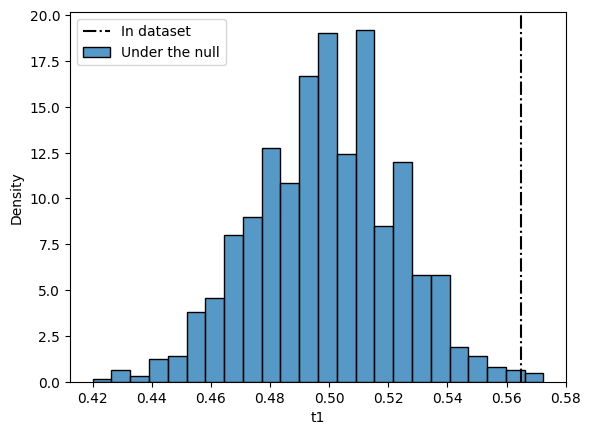

In [10]:
# 3. Plot empirical distribution of t1 and t2 (under the null)

fig, ax = plt.subplots(1)
sns.histplot(data=statistic, x='t1', stat='density', label='Under the null')
ax.axvline(t1, color='k', linestyle='-.', label='In dataset')
ax.legend()

In [11]:
# p1: how many simulated t1s are larger than data t1?
sum(statistic['t1']>t1)/len(statistic)

0.003

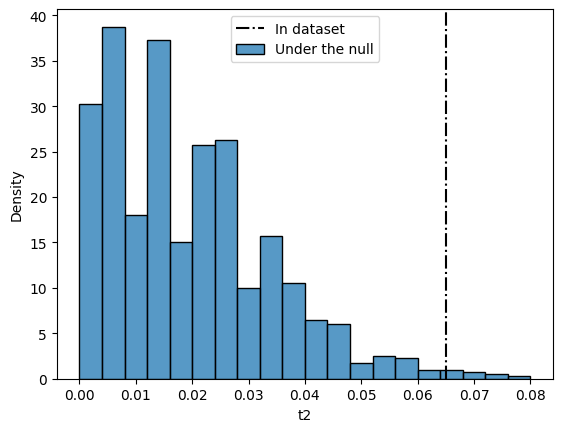

In [12]:
fig, ax = plt.subplots(1)
sns.histplot(data=statistic, x='t2', stat='density', label='Under the null')
ax.axvline(t2, color='k', linestyle='-.', label='In dataset')
ax.legend()

In [13]:
# p2: how many simulated t2s are larger than data t2?
sum(statistic['t2']>t2)/len(statistic)

0.01

Null: Group A and Group B are each sampled from population distributions that are approximately normal with potentially different standard deviations but the same mean.

Alternative: No, B distribution has a higher mean than A distribution.

Statistic: sample mean of B - sample mean of A (or some variation of it)


In [14]:
def sample_gauss(mean, std, k):
    nums = []
    for i in range(k):
        nums.append(random.gauss(mean, std))
    return nums

In [15]:
mean_A, std_A = 20, 3
mean_B, std_B = 22, 4
n_A = 30
n_B = 20

actual_A = sample_gauss(mean_A, std_A, n_A)
actual_B = sample_gauss(mean_B, std_B, n_B)

pd.DataFrame(actual_A, columns=['value']).to_csv('A.csv', index=False)
pd.DataFrame(actual_B, columns=['value']).to_csv('B.csv', index=False)

In [16]:
group_A = pd.read_csv('A.csv')
group_B = pd.read_csv('B.csv')
group_B.head()

,value
0,26.642039
1,24.772656
2,21.295907
3,26.939260
4,24.266245


In [17]:
# one statistic = mean of B - mean of A
group_B['value'].mean() - group_A['value'].mean()


np.float64(1.3378594249343436)

In [18]:
# t-statistic = (mB - mA)/sqrt(sA^2/nA + sB^2/nB)
import math
top = group_B['value'].mean() - group_A['value'].mean()
bottom = group_A['value'].std()**2/len(group_A) + group_B['value'].std()**2/len(group_B) 
t = top/math.sqrt(bottom)
t

np.float64(1.2359514548023025)

At this point, we can skip running the simulations, because the empirical distribution of t-statistic is known to come from a probability distribution called t-distribution. People have figured out what that distribution looks like and how to calculate the corresponding p-value in the theoretical curve.

`df` stands for degrees of freedom, which is something that depends on number of samples and standard deviations. No need to memorize the formula.

See parameters in 
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

In [19]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html
from scipy.stats import ttest_ind

ttest_ind(group_A['value'], group_B['value'], 
          equal_var=False, 
          alternative='less') # mean A < mean B


TtestResult(statistic=np.float64(-1.2359514548023025), pvalue=np.float64(0.11266063489847224), df=np.float64(32.552814478876115))